# Cover Crop Probe Analysis

## Analysis of ProbeSchedule Probe data 
## No cover crop (Lot 1) vs. Cover crop (Lot 2)
### Soil Moisture is M1 through M5
#### Representing soil depths 2, 4, 6, 8, 12in.
### EC Salininity is EC1 through EC5

## * To run: set working folder location below in code cell 2

# - - - - - - - - 

## Imports and data 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
import scipy
from scipy import stats

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
os.chdir('C:/Users/arist/Documents/covercrop_study')


In [3]:
cwd = os.getcwd()
print(cwd)

C:\Users\arist\Documents\covercrop_study


In [4]:
df_lot1 = pd.read_csv('lot1_moisture.csv')
df_lot2 = pd.read_csv('lot2_moisture.csv')

In [5]:
df_lot1

,Date,M1,M2,M3,M4,M5,M6,M7,M8,M9,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,1/10/2024 10:57,74.784784,85.170692,94.885218,95.104305,96.152901,97.037712,97.992653,95.189980,95.201812,44.833280,46.352030,47.644358,50.077112,50.711288,51.643292,54.132872,54.755222,55.211414
1,1/10/2024 12:06,74.850209,85.451823,94.987867,95.068378,96.195744,97.149022,98.063425,95.406497,95.347537,45.335750,46.179086,47.277842,49.839656,50.392094,51.402992,53.952422,54.795236,55.211414
2,1/10/2024 13:06,74.981492,85.617005,95.056305,95.128283,96.252879,97.176836,98.077562,95.464316,95.391312,45.934556,46.138280,47.232032,49.691120,50.300906,51.451034,53.952422,54.755222,55.320602
3,1/10/2024 14:06,75.051746,85.831178,95.113345,95.140231,96.338647,97.162946,98.091734,95.565508,95.435069,46.980230,46.188428,46.951898,49.596152,50.209718,51.258812,53.907296,54.755222,55.290326
4,1/10/2024 15:06,75.113330,86.036039,95.159033,95.176158,96.338647,97.176836,98.120096,95.522152,95.420454,47.670638,46.366988,46.957136,49.501184,50.027342,51.306890,53.907296,54.835268,55.211414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,4/23/2024 4:24,56.825029,27.048621,9.264378,10.696159,7.975636,6.652283,3.725162,10.009422,10.276833,63.268916,63.575402,62.732174,63.742694,62.855042,62.857112,64.514714,64.311224,64.272092
2268,4/23/2024 5:24,56.825029,27.048621,9.264378,10.696175,7.975636,6.652283,3.725162,10.009422,10.276833,63.093146,63.207032,62.594546,63.527882,62.535488,62.608514,64.400432,64.127642,63.723758
2269,4/23/2024 6:24,56.825029,27.048621,9.264378,10.696175,7.975636,6.652283,3.725162,10.009422,10.276833,62.649536,62.800250,62.319326,63.242600,62.124638,62.424050,64.084226,63.768128,63.612356
2270,4/23/2024 7:25,56.825029,27.048621,9.264378,10.696175,7.975636,6.652283,3.725162,10.009422,10.276833,62.435966,62.547152,61.998260,62.862242,62.071520,62.079296,63.760136,63.306518,63.295304


In [6]:
df_lot2

,Date,M1,M2,M3,M4,M5,M6,M7,M8,M9,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,1/10/2024 11:08,78.170718,82.100010,82.290979,78.790487,81.251407,88.719575,94.360998,97.097076,97.223949,46.653026,45.825404,48.847424,48.908606,50.841770,51.729296,53.934206,53.995334,55.084928
1,1/10/2024 12:07,78.220709,82.410582,82.527397,78.843358,81.406059,88.907042,94.591804,97.081752,97.179380,46.272866,44.636504,48.138494,48.537284,50.841770,51.313280,53.323034,53.854970,54.868748
2,1/10/2024 13:07,78.215338,82.554671,82.719157,78.872498,81.531159,89.053089,94.678497,97.066500,97.194218,48.132158,44.921840,47.760404,48.537284,50.577404,51.388934,53.323034,53.854970,54.744188
3,1/10/2024 14:07,78.206395,82.675116,82.861173,78.896376,81.646541,89.188906,94.736293,97.051194,97.149650,50.153486,45.302288,47.718752,48.537284,50.657450,51.225476,53.323034,53.854970,54.750650
4,1/10/2024 15:07,78.215338,82.737864,82.962187,78.912306,81.732016,89.293492,94.808580,97.035888,97.179380,50.886104,46.063202,47.885342,48.490880,50.519192,51.096776,53.323034,53.854970,54.822920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,4/17/2024 8:02,81.295127,85.367323,87.174827,79.815988,84.759559,99.300307,98.733973,100.077928,100.591834,54.311792,57.202088,58.656002,56.390810,55.970726,54.528872,55.203548,54.977846,55.032332
2346,4/17/2024 9:02,81.408102,85.341771,87.179782,79.813218,84.759559,99.323187,98.719122,100.077928,100.591834,55.025474,56.821172,58.484966,56.390810,55.852988,54.650030,55.203548,54.938066,55.111010
2347,4/17/2024 10:02,81.667991,85.326460,87.174827,79.813218,84.738139,99.334633,98.719122,100.077928,100.622253,56.595542,56.773580,58.120916,56.390810,55.931504,54.528872,55.344596,54.938066,55.156874
2348,4/17/2024 11:02,82.156934,85.300916,87.154966,79.804903,84.759559,99.311754,98.748790,100.077928,100.637454,61.266812,56.487884,58.026272,56.344352,56.069816,54.650030,55.297598,54.938066,55.320584


In [7]:
df_lot1.columns

Index(['Date', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'T1',
       'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9'],
      dtype='object')

## Data Preprocessing

In [8]:
colstokeep = ['Date', 'M1', 'M2', 'M3', 'M4', 'M5']
df_lot1.drop(columns=df_lot1.columns.difference(colstokeep), inplace=True)
df_lot2.drop(columns=df_lot2.columns.difference(colstokeep), inplace=True)
df_lot1

,Date,M1,M2,M3,M4,M5
0,1/10/2024 10:57,74.784784,85.170692,94.885218,95.104305,96.152901
1,1/10/2024 12:06,74.850209,85.451823,94.987867,95.068378,96.195744
2,1/10/2024 13:06,74.981492,85.617005,95.056305,95.128283,96.252879
3,1/10/2024 14:06,75.051746,85.831178,95.113345,95.140231,96.338647
4,1/10/2024 15:06,75.113330,86.036039,95.159033,95.176158,96.338647
...,...,...,...,...,...,...
2267,4/23/2024 4:24,56.825029,27.048621,9.264378,10.696159,7.975636
2268,4/23/2024 5:24,56.825029,27.048621,9.264378,10.696175,7.975636
2269,4/23/2024 6:24,56.825029,27.048621,9.264378,10.696175,7.975636
2270,4/23/2024 7:25,56.825029,27.048621,9.264378,10.696175,7.975636


In [9]:
sns.set_theme(style="whitegrid")

In [10]:
df_lot1_clean = df_lot1

df_lot1_clean['Date'] = pd.to_datetime(df_lot1_clean['Date'], infer_datetime_format=True)

mask3 = (df_lot1_clean['Date'] > '2024-1-10') & (df_lot1_clean['Date'] <= '2024-4-15')

df_lot1_clean = df_lot1_clean.loc[mask3]

df_lot1_clean = df_lot1_clean.dropna(subset=['M1', 'M2','M3','M4','M5'])

In [11]:
df_lot1_clean

,Date,M1,M2,M3,M4,M5
0,2024-01-10 10:57:00,74.784784,85.170692,94.885218,95.104305,96.152901
1,2024-01-10 12:06:00,74.850209,85.451823,94.987867,95.068378,96.195744
2,2024-01-10 13:06:00,74.981492,85.617005,95.056305,95.128283,96.252879
3,2024-01-10 14:06:00,75.051746,85.831178,95.113345,95.140231,96.338647
4,2024-01-10 15:06:00,75.113330,86.036039,95.159033,95.176158,96.338647
...,...,...,...,...,...,...
2066,2024-04-14 19:18:00,74.036162,94.318240,96.939966,98.239674,97.919656
2067,2024-04-14 20:18:00,74.040412,94.349907,96.893805,98.239674,97.934095
2068,2024-04-14 21:18:00,74.019182,94.318240,96.801295,98.239674,97.919656
2069,2024-04-14 22:19:00,73.985233,94.349907,96.789786,98.251914,97.905201


In [12]:
df_lot2_clean = df_lot2

df_lot2_clean['Date'] = pd.to_datetime(df_lot2_clean['Date'], infer_datetime_format=True)

mask5 = (df_lot2_clean['Date'] > '2024-1-10') & (df_lot2_clean['Date'] <= '2024-4-15')

df_lot2_clean = df_lot2_clean.loc[mask5]

df_lot2_clean = df_lot2_clean.dropna(subset=['M1', 'M2','M3','M4','M5'])

In [13]:
df_lot2_clean

,Date,M1,M2,M3,M4,M5
0,2024-01-10 11:08:00,78.170718,82.100010,82.290979,78.790487,81.251407
1,2024-01-10 12:07:00,78.220709,82.410582,82.527397,78.843358,81.406059
2,2024-01-10 13:07:00,78.215338,82.554671,82.719157,78.872498,81.531159
3,2024-01-10 14:07:00,78.206395,82.675116,82.861173,78.896376,81.646541
4,2024-01-10 15:07:00,78.215338,82.737864,82.962187,78.912306,81.732016
...,...,...,...,...,...,...
2284,2024-04-14 18:59:00,81.479166,85.855302,87.314112,79.865941,85.341129
2285,2024-04-14 19:59:00,81.445958,85.844981,87.314112,79.854826,85.270761
2286,2024-04-14 20:59:00,81.410471,85.850137,87.319077,79.860377,85.265365
2287,2024-04-14 21:59:00,81.398658,85.808871,87.319077,79.863159,85.254539


In [14]:
df_lot1_clean.describe()

,M1,M2,M3,M4,M5
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000
mean,79.630245,94.241316,98.113477,98.413341,98.516515
std,4.759918,3.948169,1.451968,1.309014,1.038648
min,64.255470,85.170692,94.885218,95.068378,96.152901
25%,78.029187,90.493125,96.582063,97.872970,97.890762
50%,79.944829,94.307693,98.310412,98.423317,98.353721
75%,81.155983,96.698107,99.428840,99.480793,99.561198
max,117.608040,100.611160,100.721473,100.334739,100.102559


In [15]:
df_lot2_clean.describe()

,M1,M2,M3,M4,M5
count,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000
mean,81.023109,88.608481,92.418208,89.327649,93.209547
std,3.437464,6.008011,7.950111,10.508945,7.358147
min,77.184397,82.100010,82.290979,78.790487,81.251407
25%,79.168673,84.823477,85.858648,79.913211,85.661590
50%,80.600248,86.124459,87.528631,80.255448,96.123654
75%,81.658363,89.170718,103.293522,101.363610,100.006810
max,102.699309,104.007247,103.725534,101.581639,101.166891


## Soil Moisture graphs

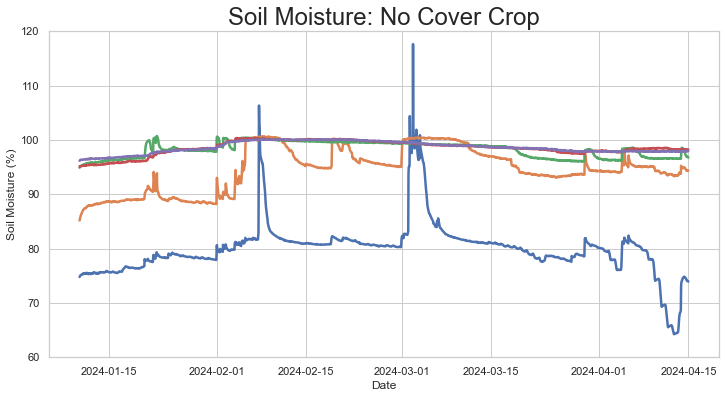

In [16]:
fig, ax = plt.subplots(figsize = (12,6)) 
fig = sns.lineplot(data=df_lot1_clean,x = df_lot1_clean.Date, y = df_lot1_clean.M1, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot1_clean,x = df_lot1_clean.Date, y = df_lot1_clean.M2, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot1_clean,x = df_lot1_clean.Date, y = df_lot1_clean.M3, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot1_clean,x = df_lot1_clean.Date, y = df_lot1_clean.M4, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot1_clean,x = df_lot1_clean.Date, y = df_lot1_clean.M5, palette="tab10", linewidth=2.5, ax=ax)
#fig = sns.lineplot(data=df_lot1,x = df_lot1.Date, linewidth=2.5, ax=ax)
# fig.autofmt_xdate()

# Set label for x-axis 
ax.set_xlabel( "Date" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "Soil Moisture (%)" , size = 12 ) 
  
# Set title for plot 
ax.set_title( "Soil Moisture: No Cover Crop" , size = 24 ) 
ymin = 60
ymax = 120
ax.set_ylim([ymin, ymax])
# Display figure 
plt.show() 

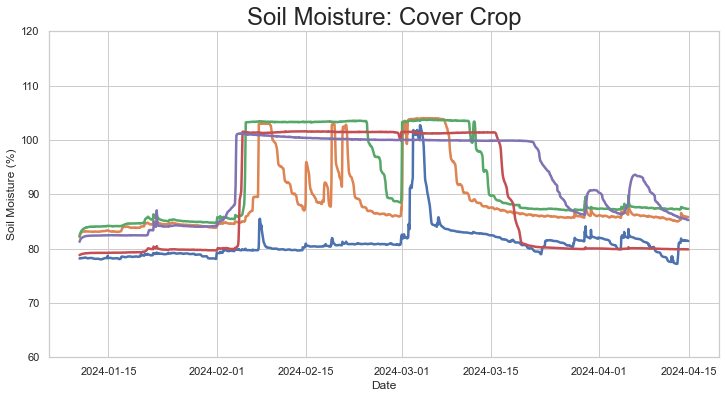

In [17]:
fig, ax = plt.subplots(figsize = (12,6)) 
fig = sns.lineplot(data=df_lot2_clean,x = df_lot2_clean.Date, y = df_lot2_clean.M1, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot2_clean,x = df_lot2_clean.Date, y = df_lot2_clean.M2, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot2_clean,x = df_lot2_clean.Date, y = df_lot2_clean.M3, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot2_clean,x = df_lot2_clean.Date, y = df_lot2_clean.M4, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot2_clean,x = df_lot2_clean.Date, y = df_lot2_clean.M5, palette="tab10", linewidth=2.5, ax=ax)
#fig = sns.lineplot(data=df_lot1,x = df_lot1.Date, linewidth=2.5, ax=ax)
# fig.autofmt_xdate()

# Set label for x-axis 
ax.set_xlabel( "Date" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "Soil Moisture (%)" , size = 12 ) 
  
# Set title for plot 
ax.set_title( "Soil Moisture: Cover Crop" , size = 24 ) 
ymin = 60
ymax = 120
ax.set_ylim([ymin, ymax])
# Display figure 
plt.show() 

## Soil Moisture T-tests of significance to reject null hypothesis of difference between means of soil moisutre readings at each depth

In [18]:
import scipy.stats as stats

#T_Tests for soil moisture statistical difference

print(stats.ttest_ind(a=df_lot1_clean.M1, b=df_lot2_clean.M1, equal_var=True))
print(stats.ttest_ind(a=df_lot1_clean.M2, b=df_lot2_clean.M2, equal_var=True))
print(stats.ttest_ind(a=df_lot1_clean.M3, b=df_lot2_clean.M3, equal_var=True))
print(stats.ttest_ind(a=df_lot1_clean.M4, b=df_lot2_clean.M4, equal_var=True))
print(stats.ttest_ind(a=df_lot1_clean.M5, b=df_lot2_clean.M5, equal_var=True))

Ttest_indResult(statistic=-11.15057146885789, pvalue=1.7227466350733627e-28)
Ttest_indResult(statistic=36.17968231900585, pvalue=7.169252770799995e-251)
Ttest_indResult(statistic=32.11961440453582, pvalue=2.3649050119864387e-203)
Ttest_indResult(statistic=39.07123946034385, pvalue=1.495460675989556e-286)
Ttest_indResult(statistic=32.52997744657729, pvalue=5.280250375542413e-208)


## EC Salinity data import and preprocessing

In [19]:
df_lot1_ec = pd.read_csv('lot1_ec.csv')
df_lot2_ec = pd.read_csv('lot2_ec.csv')

df_lot1_ec.columns

Index(['Date', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6', 'EC7', 'EC8', 'EC9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37'],
      dtype='object')

In [20]:
# colstokeep = ['Date', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6', 'EC7', 'EC8', 'EC9']
colstokeep = ['Date', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5']
df_lot1_ec.drop(columns=df_lot1_ec.columns.difference(colstokeep), inplace=True)
df_lot2_ec.drop(columns=df_lot2_ec.columns.difference(colstokeep), inplace=True)
df_lot1_ec

,Date,EC1,EC2,EC3,EC4,EC5
0,1/10/2024 21:06,1825.61,1763.90,1586.35,1629.65,-
1,1/10/2024 20:06,1213.66,1526.55,1696.1,1683.24,1735.87
2,1/10/2024 19:06,1214.53,1525.00,1694.94,1683.24,1735.87
3,1/10/2024 18:06,1213.34,1522.44,1694.94,1684.43,1735.87
4,1/10/2024 17:06,1211.76,1519.92,1694.94,1684.43,1735.87
...,...,...,...,...,...,...
2093,4/15/2024 8:18,1430.23,2014.99,1944.51,1929.39,1896.67
2094,4/15/2024 7:18,1432.33,2014.99,1944.51,1926.66,1899.25
2095,4/15/2024 6:18,1430.92,2014.99,1952.54,1926.66,1899.25
2096,4/15/2024 5:18,1430.92,2018.28,1952.54,1926.66,1896.67


In [21]:
df_lot1_ec = df_lot1_ec[pd.to_numeric(df_lot1_ec['EC1'], errors='coerce').notnull()]
df_lot1_ec = df_lot1_ec[pd.to_numeric(df_lot1_ec['EC2'], errors='coerce').notnull()]
df_lot1_ec = df_lot1_ec[pd.to_numeric(df_lot1_ec['EC3'], errors='coerce').notnull()]
df_lot1_ec = df_lot1_ec[pd.to_numeric(df_lot1_ec['EC4'], errors='coerce').notnull()]
df_lot1_ec = df_lot1_ec[pd.to_numeric(df_lot1_ec['EC5'], errors='coerce').notnull()]

df_lot1_ec

,Date,EC1,EC2,EC3,EC4,EC5
1,1/10/2024 20:06,1213.66,1526.55,1696.1,1683.24,1735.87
2,1/10/2024 19:06,1214.53,1525.00,1694.94,1683.24,1735.87
3,1/10/2024 18:06,1213.34,1522.44,1694.94,1684.43,1735.87
4,1/10/2024 17:06,1211.76,1519.92,1694.94,1684.43,1735.87
5,1/10/2024 16:06,1213.20,1517.43,1694.94,1685.62,1735.87
...,...,...,...,...,...,...
2093,4/15/2024 8:18,1430.23,2014.99,1944.51,1929.39,1896.67
2094,4/15/2024 7:18,1432.33,2014.99,1944.51,1926.66,1899.25
2095,4/15/2024 6:18,1430.92,2014.99,1952.54,1926.66,1899.25
2096,4/15/2024 5:18,1430.92,2018.28,1952.54,1926.66,1896.67


In [22]:
df_lot1_ec_clean = df_lot1_ec

df_lot1_ec_clean['Date'] = pd.to_datetime(df_lot1_ec_clean['Date'], infer_datetime_format=True)

mask = (df_lot1_ec_clean['Date'] > '2024-1-10') & (df_lot1_ec_clean['Date'] <= '2024-4-15')

df_lot1_ec_clean = df_lot1_ec_clean.loc[mask]

In [23]:
df_lot1_ec_clean

,Date,EC1,EC2,EC3,EC4,EC5
1,2024-01-10 20:06:00,1213.66,1526.55,1696.1,1683.24,1735.87
2,2024-01-10 19:06:00,1214.53,1525.00,1694.94,1683.24,1735.87
3,2024-01-10 18:06:00,1213.34,1522.44,1694.94,1684.43,1735.87
4,2024-01-10 17:06:00,1211.76,1519.92,1694.94,1684.43,1735.87
5,2024-01-10 16:06:00,1213.20,1517.43,1694.94,1685.62,1735.87
...,...,...,...,...,...,...
2043,2024-04-13 09:18:00,1676.31,2059.55,2001.11,1988,1943
2044,2024-04-13 08:18:00,1678.30,2018.28,1957.98,1957.68,1917.79
2045,2024-04-13 07:18:00,1671.92,1983.34,1916.35,1923.96,1896.67
2046,2024-04-13 06:18:00,1657.64,1892.98,1808.41,1837.76,1831.22


In [24]:
df_lot2_ec_clean = df_lot2_ec

df_lot2_ec_clean['Date'] = pd.to_datetime(df_lot2_ec_clean['Date'], infer_datetime_format=True)

mask = (df_lot2_ec_clean['Date'] > '2024-1-10') & (df_lot2_ec_clean['Date'] <= '2024-4-15')

df_lot2_ec_clean = df_lot2_ec_clean.loc[mask]

In [25]:
df_lot1_ec_clean = df_lot1_ec_clean.convert_dtypes()
df_lot1_ec_clean = df_lot1_ec_clean.replace('-', np.nan)
df_lot1_ec_clean = df_lot1_ec_clean.replace('', np.nan)

df_lot1_ec_clean = df_lot1_ec_clean.dropna()

df_lot2_ec_clean = df_lot2_ec_clean.convert_dtypes()
df_lot2_ec_clean = df_lot2_ec_clean.replace('-', np.nan)
df_lot2_ec_clean = df_lot2_ec_clean.replace('', np.nan)

df_lot2_ec_clean = df_lot2_ec_clean.dropna()

In [26]:
df_lot1_ec_clean['EC1'] = df_lot1_ec_clean['EC1'].astype(float)
df_lot1_ec_clean['EC2'] = df_lot1_ec_clean['EC2'].astype(float)
df_lot1_ec_clean['EC3'] = df_lot1_ec_clean['EC3'].astype(float)
df_lot1_ec_clean['EC4'] = df_lot1_ec_clean['EC4'].astype(float)
df_lot1_ec_clean['EC5'] = df_lot1_ec_clean['EC5'].astype(float)

In [27]:
df_lot1_ec_clean

,Date,EC1,EC2,EC3,EC4,EC5
1,2024-01-10 20:06:00,1213.66,1526.55,1696.10,1683.24,1735.87
2,2024-01-10 19:06:00,1214.53,1525.00,1694.94,1683.24,1735.87
3,2024-01-10 18:06:00,1213.34,1522.44,1694.94,1684.43,1735.87
4,2024-01-10 17:06:00,1211.76,1519.92,1694.94,1684.43,1735.87
5,2024-01-10 16:06:00,1213.20,1517.43,1694.94,1685.62,1735.87
...,...,...,...,...,...,...
2043,2024-04-13 09:18:00,1676.31,2059.55,2001.11,1988.00,1943.00
2044,2024-04-13 08:18:00,1678.30,2018.28,1957.98,1957.68,1917.79
2045,2024-04-13 07:18:00,1671.92,1983.34,1916.35,1923.96,1896.67
2046,2024-04-13 06:18:00,1657.64,1892.98,1808.41,1837.76,1831.22


In [28]:
df_lot2_ec_clean

,Date,EC1,EC2,EC3,EC4,EC5
0,2024-01-11 01:10:00,1246.69,1289.01,1160.37,1169.05,1337.97
1,2024-01-11 00:11:00,1251.51,1289.01,1159.2,1168.76,1337.58
2,2024-01-10 23:10:00,1251.79,1289.34,1158.9,1168.38,1337.97
3,2024-01-10 22:10:00,1252.82,1289.66,1158.9,1169.77,1338.76
4,2024-01-10 21:10:00,1257.38,1287.06,1154.79,1167.72,1335.23
...,...,...,...,...,...,...
2297,2024-04-13 17:00:00,1173.7,1371.97,1312.16,1199.37,1456.9
2298,2024-04-13 15:59:00,1173.79,1371.97,1313.1,1199.65,1457.37
2299,2024-04-13 14:59:00,1173.8,1372.31,1313.74,1200.67,1458.77
2300,2024-04-13 13:59:00,1173.36,1373.01,1314.37,1200.88,1459.24


In [29]:
df_lot1_ec_clean.describe()

,EC1,EC2,EC3,EC4,EC5
count,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
mean,1359.077907,1880.332912,2039.240237,1872.807552,1866.682335
std,149.952144,193.232423,221.954157,84.444496,62.499333
min,1200.930000,1223.690000,1318.670000,1540.090000,1731.500000
25%,1288.327500,1708.175000,1844.730000,1829.390000,1826.990000
50%,1328.930000,1895.430000,2022.730000,1852.940000,1848.670000
75%,1362.102500,2021.590000,2192.950000,1932.130000,1912.400000
max,2213.600000,2406.650000,2651.270000,2239.870000,2539.760000


## EC Salinity Graphs

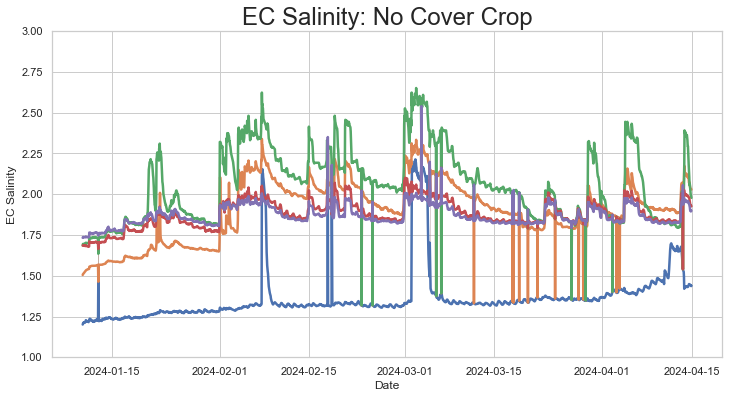

In [30]:
fig, ax = plt.subplots(figsize = (12,6)) 
fig = sns.lineplot(data=df_lot1_ec_clean,x = df_lot1_ec_clean.Date, y = df_lot1_ec_clean.EC1 /1000, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot1_ec_clean,x = df_lot1_ec_clean.Date, y = df_lot1_ec_clean.EC2 / 1000, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot1_ec_clean,x = df_lot1_ec_clean.Date, y = df_lot1_ec_clean.EC3 / 1000, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot1_ec_clean,x = df_lot1_ec_clean.Date, y = df_lot1_ec_clean.EC4 / 1000, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot1_ec_clean,x = df_lot1_ec_clean.Date, y = df_lot1_ec_clean.EC5 / 1000, palette="tab10", linewidth=2.5, ax=ax)
#fig = sns.lineplot(data=df_lot1,x = df_lot1.Date, linewidth=2.5, ax=ax)
# fig.autofmt_xdate()

# Set label for x-axis 
ax.set_xlabel( "Date" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "EC Salinity" , size = 12 ) 
  
# Set title for plot 
ax.set_title( "EC Salinity: No Cover Crop" , size = 24 ) 
ymin = 1
ymax = 3
ax.set_ylim([ymin, ymax])
# Display figure 
plt.show() 

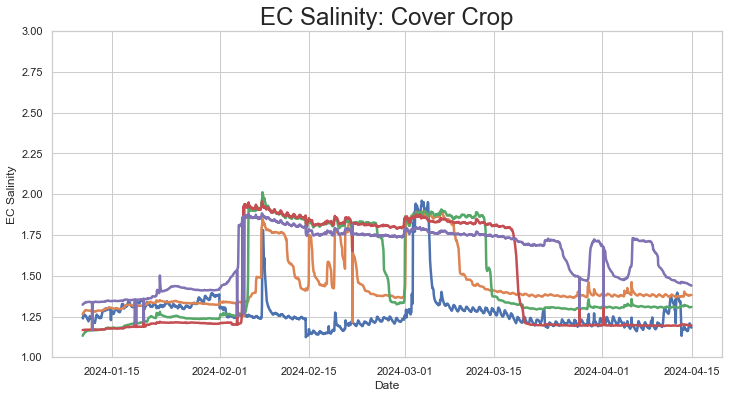

In [31]:
fig, ax = plt.subplots(figsize = (12,6)) 
fig = sns.lineplot(data=df_lot2_ec_clean,x = df_lot2_ec_clean.Date, y = df_lot2_ec_clean.EC1 /1000, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot2_ec_clean,x = df_lot2_ec_clean.Date, y = df_lot2_ec_clean.EC2 / 1000, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot2_ec_clean,x = df_lot2_ec_clean.Date, y = df_lot2_ec_clean.EC3 / 1000, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot2_ec_clean,x = df_lot2_ec_clean.Date, y = df_lot2_ec_clean.EC4 / 1000, palette="tab10", linewidth=2.5, ax=ax)
fig = sns.lineplot(data=df_lot2_ec_clean,x = df_lot2_ec_clean.Date, y = df_lot2_ec_clean.EC5 / 1000, palette="tab10", linewidth=2.5, ax=ax)
#fig = sns.lineplot(data=df_lot1,x = df_lot1.Date, linewidth=2.5, ax=ax)
# fig.autofmt_xdate()

# Set label for x-axis 
ax.set_xlabel( "Date" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "EC Salinity" , size = 12 ) 
  
# Set title for plot 
ax.set_title( "EC Salinity: Cover Crop" , size = 24 ) 
ymin = 1
ymax = 3
ax.set_ylim([ymin, ymax])
# Display figure 
plt.show() 

## EC Salinity T-tests of significance to reject null hypothesis of difference between means of EC Salinity readings at each depth

In [32]:
#T_Tests for soil moisture statistical difference

print(stats.ttest_ind(a=df_lot1_ec_clean.EC1, b=df_lot2_ec_clean.EC1, equal_var=True))
print(stats.ttest_ind(a=df_lot1_ec_clean.EC2, b=df_lot2_ec_clean.EC2, equal_var=True))
print(stats.ttest_ind(a=df_lot1_ec_clean.EC3, b=df_lot2_ec_clean.EC3, equal_var=True))
print(stats.ttest_ind(a=df_lot1_ec_clean.EC4, b=df_lot2_ec_clean.EC4, equal_var=True))
print(stats.ttest_ind(a=df_lot1_ec_clean.EC5, b=df_lot2_ec_clean.EC5, equal_var=True))

Ttest_indResult(statistic=20.107273976713227, pvalue=4.9927346437229585e-86)
Ttest_indResult(statistic=78.02639362349947, pvalue=0.0)
Ttest_indResult(statistic=71.44005701344643, pvalue=0.0)
Ttest_indResult(statistic=52.891135488453344, pvalue=0.0)
Ttest_indResult(statistic=59.927319279659045, pvalue=0.0)
